In [2]:
# 1) IMPORTAÇÃO DE BIBLIOTECAS

# Manipulação e visualização
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e modelagem
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Balanceamento
from imblearn.over_sampling import SMOTE

# Explicabilidade (extra 9)
import shap

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Imports OK.")


Imports OK.


In [3]:
# 2) CARREGAMENTO DA BASE DE DADOS


# Caminho completo do arquivo
arquivo = r"C:\Users\will\Downloads\marketing_campaign.csv"  # o r evita erro com as barras "\"

# Leitura do arquivo
df = pd.read_csv(arquivo, sep="\t")  # usa tabulação como separador, funciona melhor nesta base

# Visualização inicial
print("Dimensões da base:", df.shape)  # mostra linhas e colunas
display(df.head(3))  # mostra as 3 primeiras linhas

# Informações gerais
df.info()

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isna().sum())

# Estatísticas descritivas básicas
display(df.describe())


Dimensões da base: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


C:\Users\will\AppData\Local\Temp\ipykernel_24400\1806874177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Response", palette="pastel")


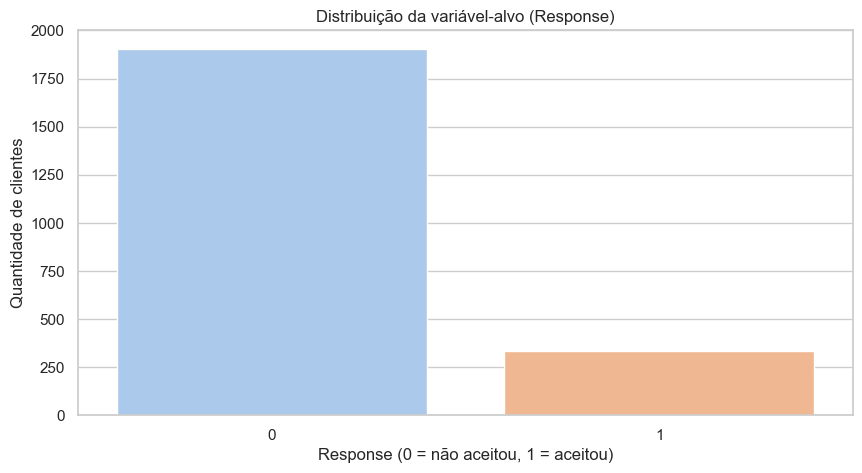

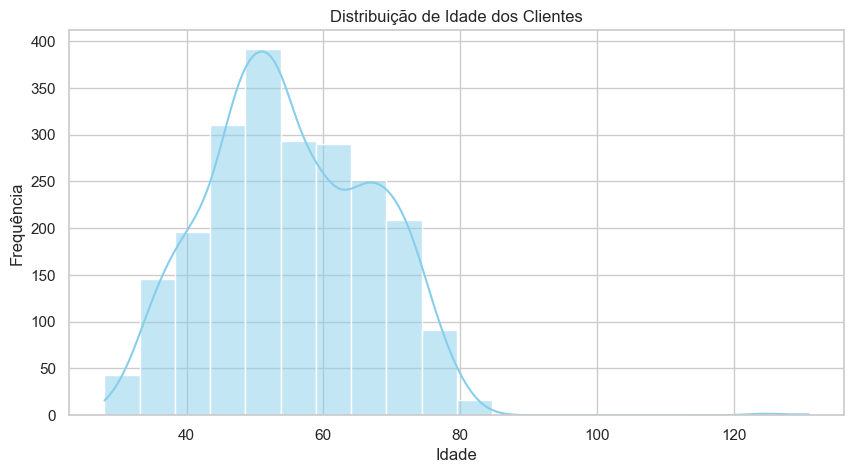

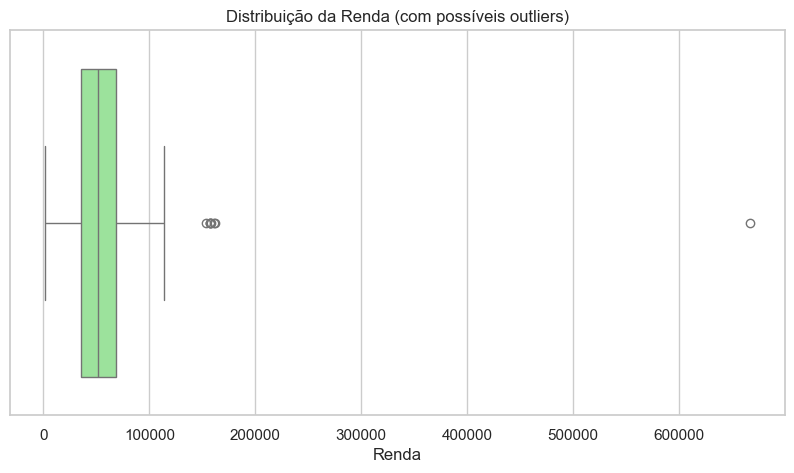

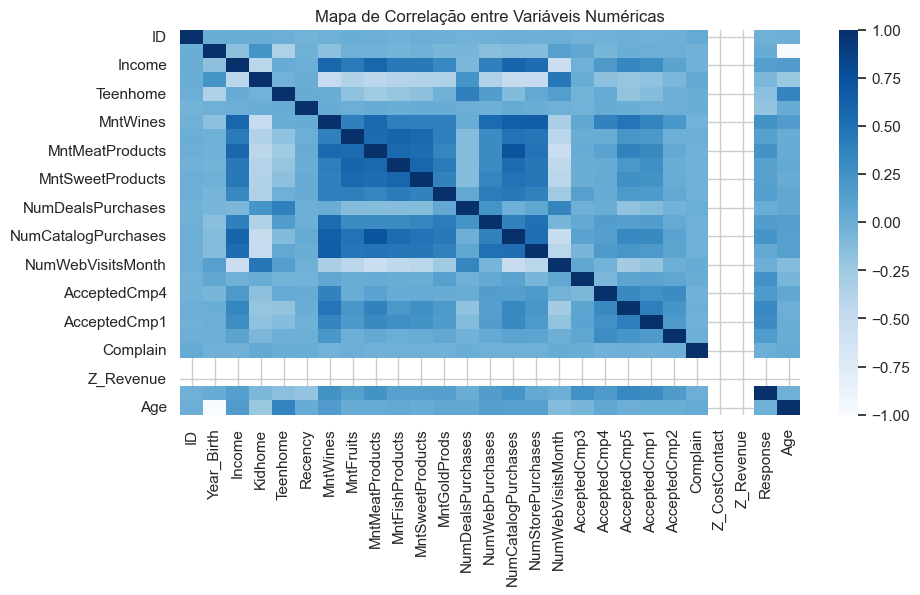

In [4]:
# 3) ANÁLISE EXPLORATÓRIA (EDA)
# ==========================================

# --- Distribuição da variável alvo (Response)
sns.countplot(data=df, x="Response", palette="pastel")
plt.title("Distribuição da variável-alvo (Response)")
plt.xlabel("Response (0 = não aceitou, 1 = aceitou)")
plt.ylabel("Quantidade de clientes")
plt.show()

# --- Histograma da idade
df["Age"] = 2024 - df["Year_Birth"]
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribuição de Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# --- Distribuição da renda
sns.boxplot(x=df["Income"], color="lightgreen")
plt.title("Distribuição da Renda (com possíveis outliers)")
plt.xlabel("Renda")
plt.show()

# --- Correlação entre variáveis numéricas
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap="Blues", annot=False)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()


In [5]:
# 4) PRÉ-PROCESSAMENTO 


# ---- 4.1 Limpeza básica ----
# Remover outliers extremos (valores fora da realidade)
df = df[df["Year_Birth"] > 1940]        # remove idades absurdas (>84 anos)
df = df[df["Income"] < 600000]          # remove rendas extremamente altas

# Preencher valores ausentes de renda com a MEDIANA
df["Income"] = df["Income"].fillna(df["Income"].median())

# ---- 4.2 Criação de novas features ----
df["Age"] = 2024 - df["Year_Birth"]
df["Dependents"] = df["Kidhome"] + df["Teenhome"]
df["TotalSpent"] = df[["MntWines", "MntFruits", "MntMeatProducts",
                       "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)
df["IncomePerCapita"] = df["Income"] / (1 + df["Dependents"])

# Converter data e calcular tempo de relacionamento
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
df["DaysSinceEnroll"] = (pd.Timestamp("2024-01-01") - df["Dt_Customer"]).dt.days

# ---- 4.3 Seleção de features e alvo ----
target = "Response"
X = df.drop(columns=[target, "ID", "Year_Birth", "Dt_Customer"])
y = df[target]

# Separar numéricas e categóricas
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(exclude=np.number).columns.tolist()

print("Numéricas:", num_features)
print("Categóricas:", cat_features)

# ---- 4.4 Pipelines de transformação ----
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numéricas → imputar (mediana) + padronizar
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas → imputar (mais frequente) + OneHotEncoder
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combina numéricas e categóricas
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

print("Pré-processamento configurado com sucesso (com imputação por mediana).")


Numéricas: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'Dependents', 'TotalSpent', 'IncomePerCapita', 'DaysSinceEnroll']
Categóricas: ['Education', 'Marital_Status']
Pré-processamento configurado com sucesso (com imputação por mediana).


In [6]:
# 5) SEPARAÇÃO TREINO/TESTE E MODELOS BÁSICOS


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import time

# Divisão treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print("Treino:", X_train.shape, " | Teste:", X_test.shape)

# Função auxiliar para treinar e avaliar rapidamente
def treinar_modelo(nome, modelo, preprocessor):
    from sklearn.pipeline import Pipeline

    pipe = Pipeline([
        ("prep", preprocessor),
        ("clf", modelo)
    ])

    inicio = time.time()
    pipe.fit(X_train, y_train)
    tempo = time.time() - inicio

    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps["clf"], "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\nModelo: {nome}")
    print(f"Tempo de treino: {tempo:.2f}s")
    print(f"Acurácia: {acc:.3f} | F1: {f1:.3f} | ROC-AUC: {roc:.3f}" if roc else f"Acurácia: {acc:.3f} | F1: {f1:.3f}")
    print(classification_report(y_test, y_pred))
    return {"Modelo": nome, "Acurácia": acc, "F1": f1, "ROC-AUC": roc, "Tempo": tempo}

# Lista de modelos básicos
modelos = [
    ("Logistic Regression", LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")),
    ("SVC (RBF)", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)),
    ("XGBoost", XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5,
        subsample=0.9, colsample_bytree=0.9,
        scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ))
]

# Treinar e comparar resultados
resultados = []
for nome, modelo in modelos:
    resultados.append(treinar_modelo(nome, modelo, preprocessor))

# Comparativo final
resultados_df = pd.DataFrame(resultados)
display(resultados_df)



Treino: (1547, 30)  | Teste: (664, 30)

Modelo: Logistic Regression
Tempo de treino: 0.02s
Acurácia: 0.822 | F1: 0.579 | ROC-AUC: 0.910
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       564
           1       0.45      0.81      0.58       100

    accuracy                           0.82       664
   macro avg       0.71      0.82      0.73       664
weighted avg       0.88      0.82      0.84       664


Modelo: Random Forest
Tempo de treino: 0.43s
Acurácia: 0.883 | F1: 0.426 | ROC-AUC: 0.874
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       564
           1       0.81      0.29      0.43       100

    accuracy                           0.88       664
   macro avg       0.85      0.64      0.68       664
weighted avg       0.87      0.88      0.86       664


Modelo: SVC (RBF)
Tempo de treino: 0.26s
Acurácia: 0.836 | F1: 0.569 | ROC-AUC: 0.901
              precision    recal

c:\Users\will\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:19:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Modelo,Acurácia,F1,ROC-AUC,Tempo
0,Logistic Regression,0.822289,0.578571,0.910293,0.021120
1,Random Forest,0.882530,0.426471,0.873998,0.430357
2,SVC (RBF),0.835843,0.569170,0.900576,0.256774
3,XGBoost,0.871988,0.568528,0.894459,0.093587


In [7]:
# 6) OTIMIZAÇÃO DE MODELO – RANDOM FOREST
# ==========================================

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

# Definição do modelo base
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Espaço de busca (valores testados aleatoriamente)
param_dist = {
    "clf__n_estimators": randint(100, 400),
    "clf__max_depth": randint(3, 10),
    "clf__min_samples_split": randint(2, 10),
    "clf__min_samples_leaf": randint(1, 5),
    "clf__max_features": ["sqrt", "log2"],
}

# Pipeline completo
from sklearn.pipeline import Pipeline
pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("clf", rf)
])

# RandomizedSearchCV – busca aleatória mais rápida que GridSearch
search = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

inicio = time.time()
search.fit(X_train, y_train)
tempo = time.time() - inicio

print(f"\nTempo total de tuning: {tempo:.1f}s")
print("Melhores parâmetros encontrados:")
print(search.best_params_)

# Avaliação no conjunto de teste
best_rf = search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, f1_score

print("\nAvaliação no conjunto de teste:")
print(classification_report(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tempo total de tuning: 9.3s
Melhores parâmetros encontrados:
{'clf__max_depth': 4, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 3, 'clf__n_estimators': 301}

Avaliação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       564
           1       0.41      0.65      0.51       100

    accuracy                           0.81       664
   macro avg       0.67      0.74      0.69       664
weighted avg       0.85      0.81      0.82       664

F1: 0.5058365758754864
ROC-AUC: 0.8644414893617021


In [8]:
# 6) OTIMIZAÇÃO DE MODELO – XGBOOST
# ==========================================

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import time

# Modelo base
xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])),
    eval_metric='logloss',
    use_label_encoder=False
)

# Espaço de busca (equilibrado entre performance e tempo)
param_dist_xgb = {
    "clf__n_estimators": randint(100, 400),
    "clf__max_depth": randint(3, 10),
    "clf__learning_rate": uniform(0.01, 0.2),
    "clf__subsample": uniform(0.7, 0.3),
    "clf__colsample_bytree": uniform(0.7, 0.3),
    "clf__gamma": uniform(0, 0.3),
}

# Pipeline completo
pipe_xgb = Pipeline([
    ("prep", preprocessor),
    ("clf", xgb)
])

# RandomizedSearchCV – busca rápida
search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

inicio = time.time()
search_xgb.fit(X_train, y_train)
tempo = time.time() - inicio

print(f"\nTempo total de tuning: {tempo:.1f}s")
print("Melhores parâmetros encontrados:")
print(search_xgb.best_params_)

# Avaliação final no conjunto de teste
best_xgb = search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\nAvaliação no conjunto de teste:")
print(classification_report(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tempo total de tuning: 3.2s
Melhores parâmetros encontrados:
{'clf__colsample_bytree': np.float64(0.9744879026631341), 'clf__gamma': np.float64(0.2550115733369398), 'clf__learning_rate': np.float64(0.09989013482764068), 'clf__max_depth': 3, 'clf__n_estimators': 147, 'clf__subsample': np.float64(0.8112454756594799)}

Avaliação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       564
           1       0.48      0.65      0.55       100

    accuracy                           0.84       664
   macro avg       0.71      0.76      0.73       664
weighted avg       0.87      0.84      0.85       664

F1: 0.5531914893617021
ROC-AUC: 0.9029343971631205


c:\Users\will\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:19:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


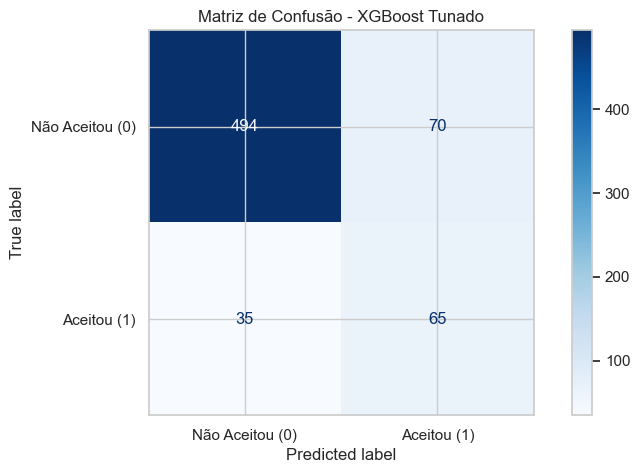

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.934     0.876     0.904       564
           1      0.481     0.650     0.553       100

    accuracy                          0.842       664
   macro avg      0.708     0.763     0.729       664
weighted avg      0.866     0.842     0.851       664



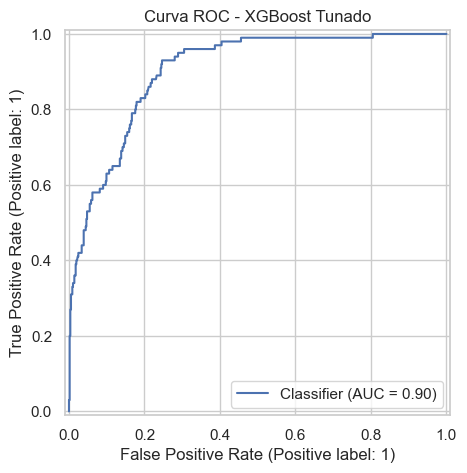

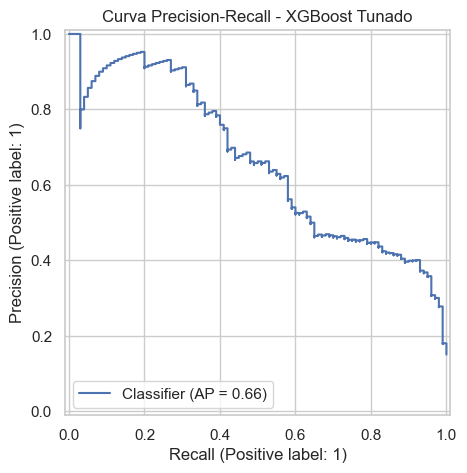

In [9]:
# 7) AVALIAÇÃO DO MODELO FINAL (XGBOOST)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, classification_report

# Previsões no conjunto de teste
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# --- Matriz de confusão ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Aceitou (0)", "Aceitou (1)"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - XGBoost Tunado")
plt.show()

# --- Relatório de métricas ---
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))

# --- Curva ROC ---
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Curva ROC - XGBoost Tunado")
plt.show()

# --- Curva Precision-Recall ---
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Curva Precision-Recall - XGBoost Tunado")
plt.show()


<Figure size 900x500 with 0 Axes>

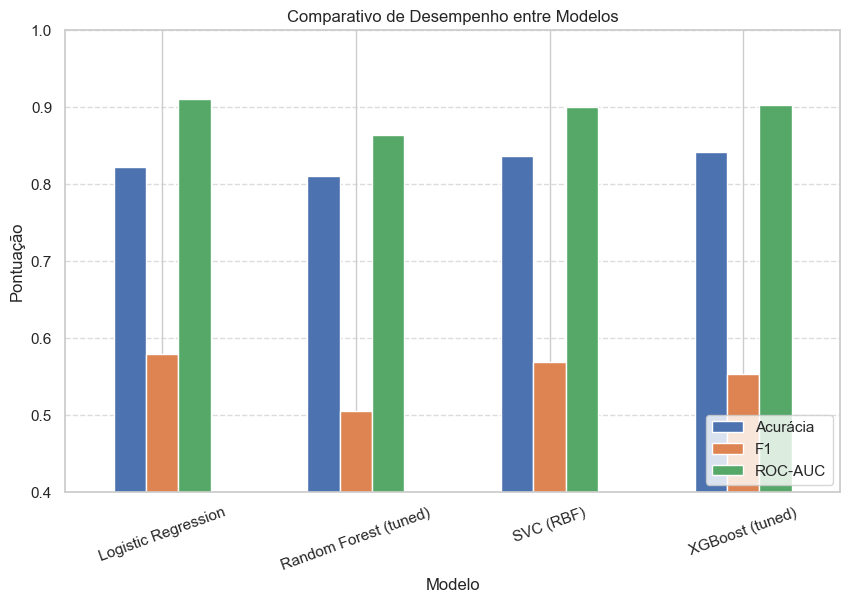

,Modelo,Acurácia,F1,ROC-AUC
0,Logistic Regression,0.822,0.579,0.910
1,Random Forest (tuned),0.810,0.506,0.864
2,SVC (RBF),0.836,0.569,0.900
3,XGBoost (tuned),0.842,0.553,0.903


In [10]:
# 8) COMPARATIVO DE PERFORMANCE ENTRE MODELOS
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# Dados coletados das execuções anteriores
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Random Forest (tuned)", "SVC (RBF)", "XGBoost (tuned)"],
    "Acurácia": [0.822, 0.810, 0.836, 0.842],
    "F1": [0.579, 0.506, 0.569, 0.553],
    "ROC-AUC": [0.910, 0.864, 0.900, 0.903]
})

# --- Gráfico comparativo ---
plt.figure(figsize=(9,5))
resultados.set_index("Modelo")[["Acurácia", "F1", "ROC-AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Comparativo de Desempenho entre Modelos")
plt.ylabel("Pontuação")
plt.ylim(0.4, 1.0)
plt.xticks(rotation=20)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Exibir tabela resumo
display(resultados)


C:\Users\will\AppData\Local\Temp\ipykernel_24400\1125676084.py:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, features=X_plot, feature_names=feature_names, show=True)


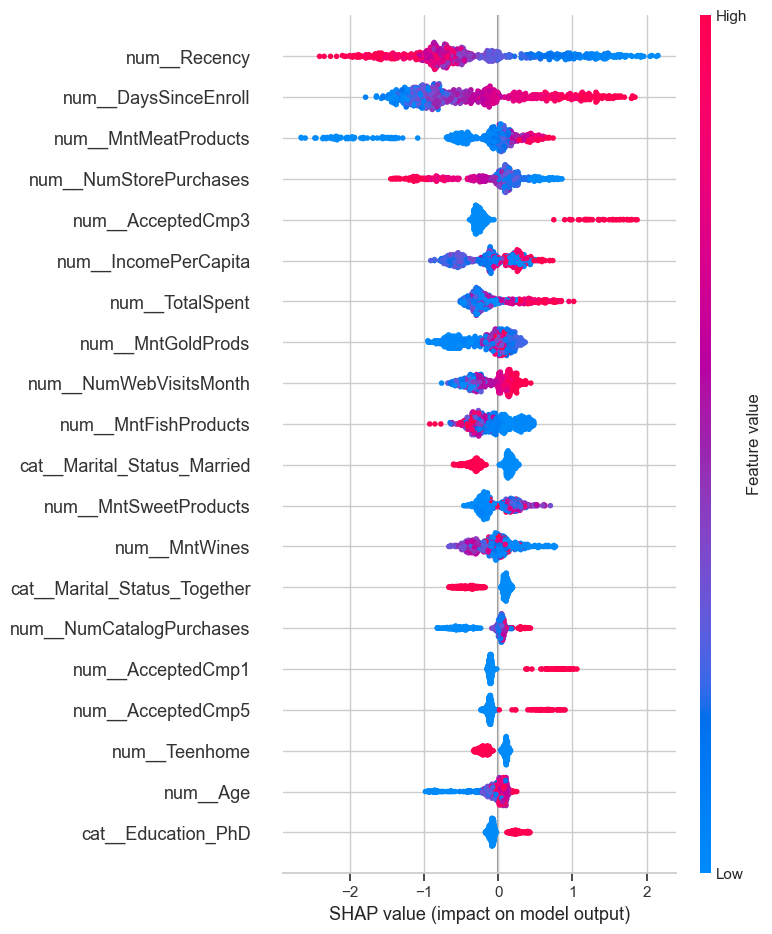

C:\Users\will\AppData\Local\Temp\ipykernel_24400\1125676084.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, feature_names=feature_names, plot_type="bar", show=True)


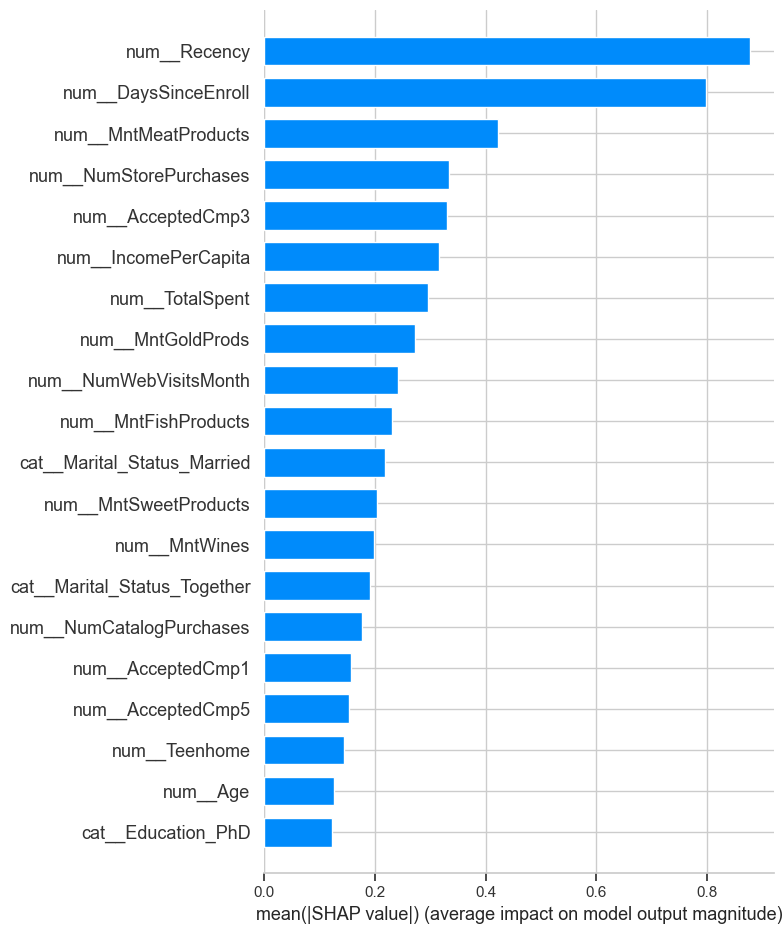

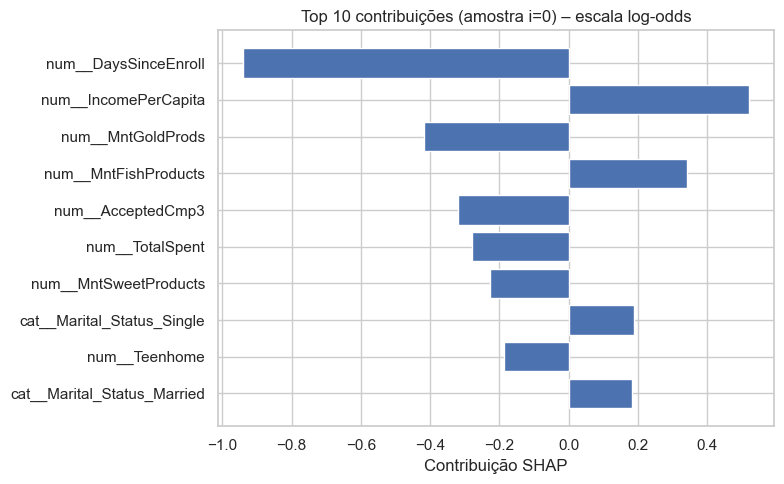

Probabilidade reconstruída para a amostra 0: 0.251


In [11]:
# ==========================================
# 9) EXPLICABILIDADE (via SHAP nativo do XGBoost) — CORRIGIDO
# ==========================================

import numpy as np
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# 1) Dados transformados + nomes das colunas como LISTA de str
X_test_tx = best_xgb.named_steps["prep"].transform(X_test)
feature_names = best_xgb.named_steps["prep"].get_feature_names_out()
feature_names = [str(f) for f in feature_names]  # <- converte p/ lista de strings

# 2) Booster nativo do XGBoost
booster = best_xgb.named_steps["clf"].get_booster()

# 3) DMatrix com nomes válidos
dtest = xgb.DMatrix(data=X_test_tx, feature_names=feature_names)

# 4) SHAP nativo do XGBoost (contribuições)
contrib = booster.predict(dtest, pred_contribs=True, approx_contribs=False)
shap_vals = contrib[:, :-1]   # contribuições por feature
base_vals = contrib[:, -1]    # termo base (bias)

# 5) Para plot: se for esparso, converter só para visualização
X_plot = X_test_tx.toarray() if hasattr(X_test_tx, "toarray") else X_test_tx

# --- Global: summary plot (dispersão) ---
shap.summary_plot(shap_vals, features=X_plot, feature_names=feature_names, show=True)

# --- Global: barras (importância média absoluta) ---
shap.summary_plot(shap_vals, feature_names=feature_names, plot_type="bar", show=True)

# --- Local: top 10 contribuições da amostra i ---
i = 0
vals = shap_vals[i]
idx = np.argsort(np.abs(vals))[-10:]

plt.figure(figsize=(8,5))
plt.barh(np.array(feature_names)[idx], vals[idx])
plt.title("Top 10 contribuições (amostra i=0) – escala log-odds")
plt.xlabel("Contribuição SHAP")
plt.tight_layout()
plt.show()

# (Opcional) Reconstruir probabilidade a partir das contribs
logit = base_vals[i] + shap_vals[i].sum()
prob = 1 / (1 + np.exp(-logit))
print(f"Probabilidade reconstruída para a amostra {i}: {prob:.3f}")


In [12]:
import joblib

# Salvar o pipeline completo (pré-processamento + modelo)
joblib.dump(best_xgb, "modelo_marketing.pkl")

print("Modelo salvo como modelo_marketing.pkl")


Modelo salvo como modelo_marketing.pkl
